In [1]:
import pandas as pd
import numpy as np
import pandasql as pdsql
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams['figure.figsize'] = [50, 10]

In [2]:
# load xlsx after additional minor manual data cleaning (e.g. missing Prüfungsnummer)
grades_df = pd.read_excel('grade_stats_auswertung.xlsx') 

In [3]:
grades_df.head()

,Grade,first_exam,second_exam,total,exam_year,exam_semester,exam_number,course,degree
0,"1,0",25.0,19.0,44.0,2017,Wintersemester,333210003.0,Grundzüge der BWL: Einführung in die Theorie d...,Bachelor
1,"1,3",7.0,7.0,14.0,2017,Wintersemester,333210003.0,Grundzüge der BWL: Einführung in die Theorie d...,Bachelor
2,"1,7",4.0,6.0,10.0,2017,Wintersemester,333210003.0,Grundzüge der BWL: Einführung in die Theorie d...,Bachelor
3,"2,0",12.0,6.0,18.0,2017,Wintersemester,333210003.0,Grundzüge der BWL: Einführung in die Theorie d...,Bachelor
4,"2,3",5.0,4.0,9.0,2017,Wintersemester,333210003.0,Grundzüge der BWL: Einführung in die Theorie d...,Bachelor


In [4]:
grades_df = grades_df[~grades_df['total'].isnull()]  # get rid missing grade counts

In [5]:
# convert to numeric for calculating mean later
grades_df['Grade'] = grades_df['Grade'].str.replace(',', '.', regex=False)
grades_df['Grade'] = grades_df['Grade'].apply(pd.to_numeric)

In [6]:
grades_df = grades_df[grades_df['Grade'] < 5]  # only take those which passed the exam

In [7]:
pysql = lambda q: pdsql.sqldf(q, globals())

sql_str = """ SELECT exam_year || '-' || substr(exam_semester, 1,2) as period,
                     sum(Grade*total)/sum(total) as mean_bachelor_grade
            FROM grades_df 
            WHERE degree = 'Bachelor'
            GROUP BY exam_year || '-' || exam_semester; """

agg_bachelor_ts = pysql(sql_str)

sql_str = """ SELECT exam_year || '-' || substr(exam_semester, 1,2) as period,
                     sum(Grade*total)/sum(total) as mean_master_grade
            FROM grades_df 
            WHERE degree = 'Master'
            GROUP BY exam_year || '-' || exam_semester; """

agg_master_ts = pysql(sql_str)

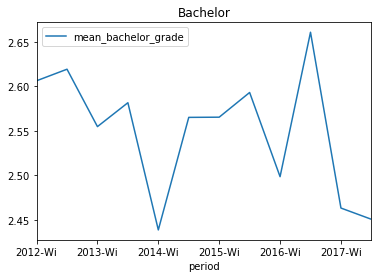

<Figure size 432x288 with 0 Axes>

In [10]:
agg_bachelor_ts.plot(x='period', y='mean_bachelor_grade', title='Bachelor')
plt.savefig(f"plots/bachelor_timeseries.png")  # save plots 

plt.show()
plt.clf()  

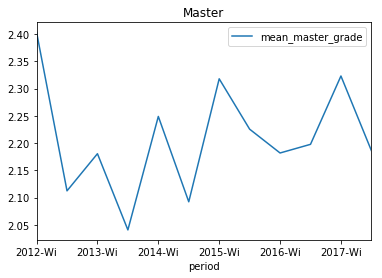

<Figure size 432x288 with 0 Axes>

In [11]:
agg_master_ts.plot(x='period', y='mean_master_grade', title='Master')
plt.savefig(f"plots/master_timeseries.png")  # save plots 

plt.show()
plt.clf()  

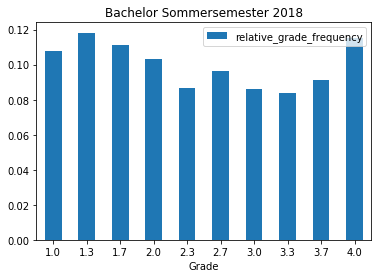

<Figure size 432x288 with 0 Axes>

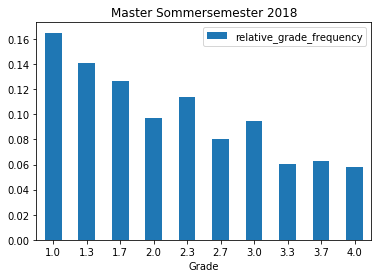

<Figure size 432x288 with 0 Axes>

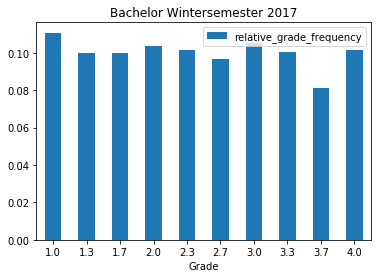

<Figure size 432x288 with 0 Axes>

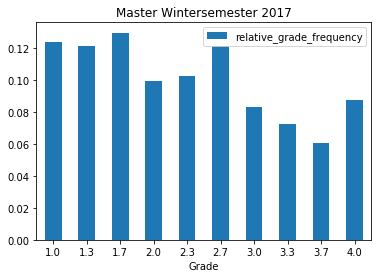

<Figure size 432x288 with 0 Axes>

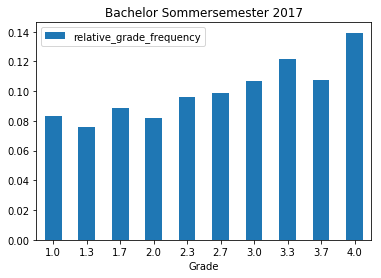

<Figure size 432x288 with 0 Axes>

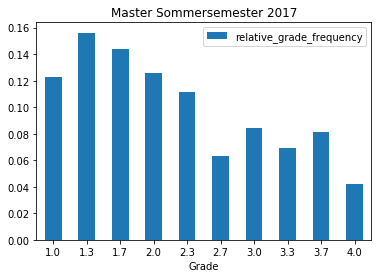

<Figure size 432x288 with 0 Axes>

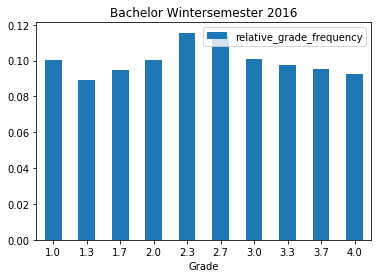

<Figure size 432x288 with 0 Axes>

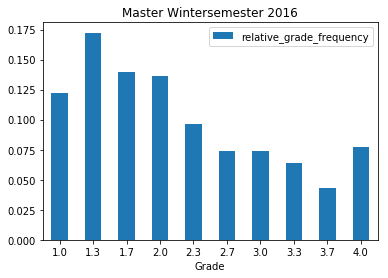

<Figure size 432x288 with 0 Axes>

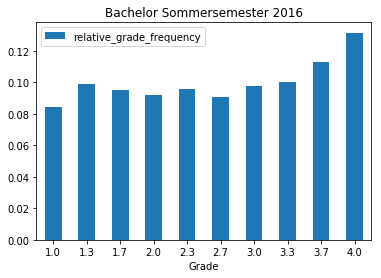

<Figure size 432x288 with 0 Axes>

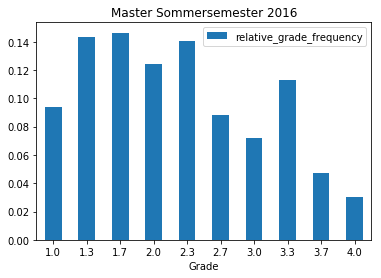

<Figure size 432x288 with 0 Axes>

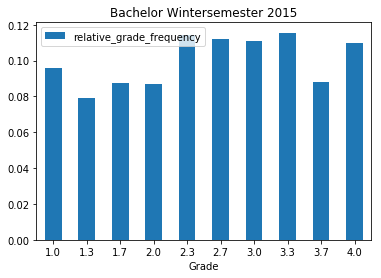

<Figure size 432x288 with 0 Axes>

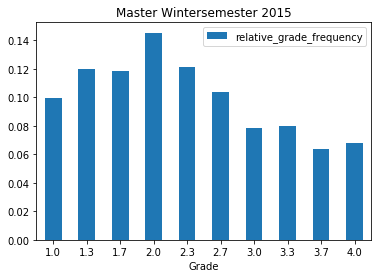

<Figure size 432x288 with 0 Axes>

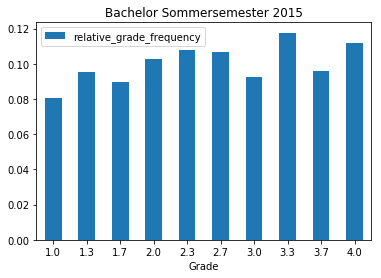

<Figure size 432x288 with 0 Axes>

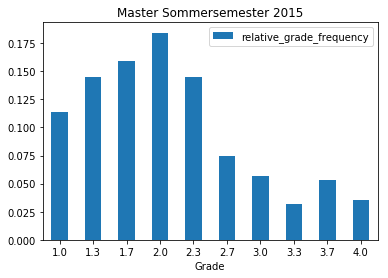

<Figure size 432x288 with 0 Axes>

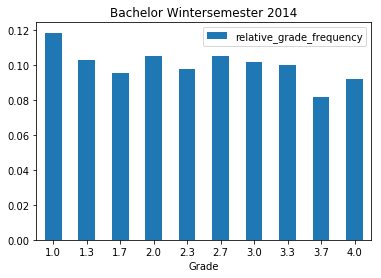

<Figure size 432x288 with 0 Axes>

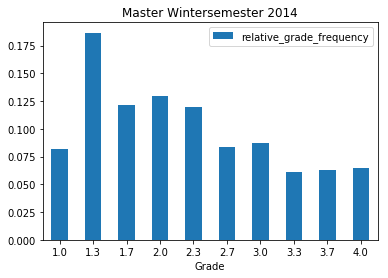

<Figure size 432x288 with 0 Axes>

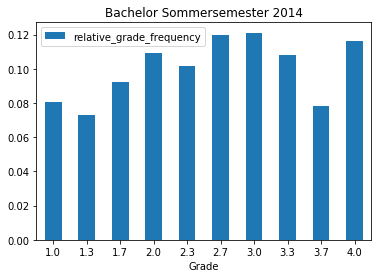

<Figure size 432x288 with 0 Axes>

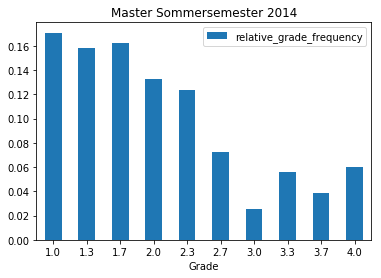

<Figure size 432x288 with 0 Axes>

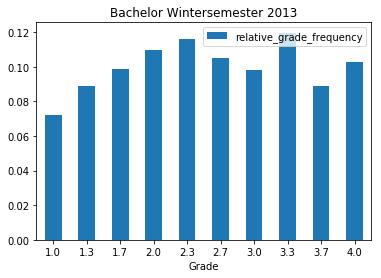

<Figure size 432x288 with 0 Axes>

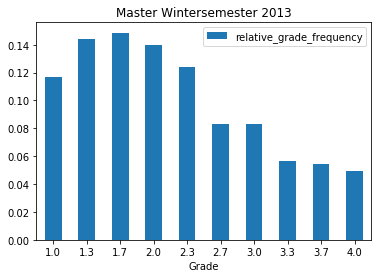

<Figure size 432x288 with 0 Axes>

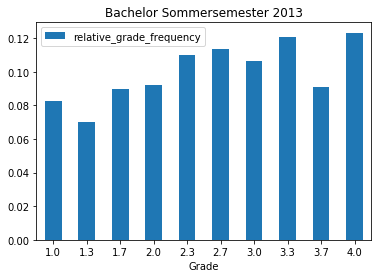

<Figure size 432x288 with 0 Axes>

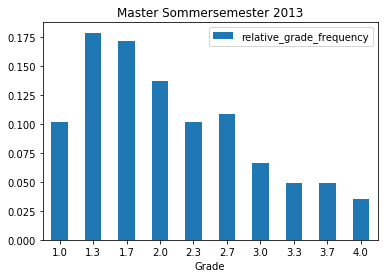

<Figure size 432x288 with 0 Axes>

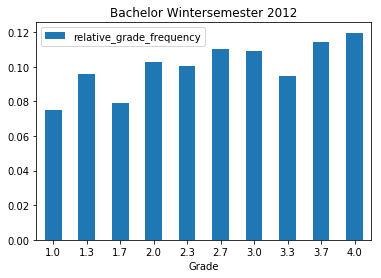

<Figure size 432x288 with 0 Axes>

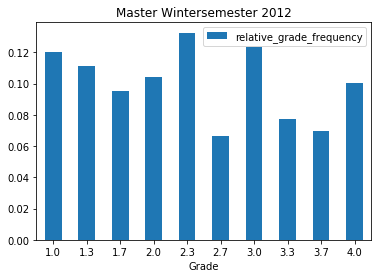

<Figure size 432x288 with 0 Axes>

In [12]:
years = reversed(sorted(list(grades_df['exam_year'].unique())))
for year in years:
    for semester in ['Wintersemester', 'Sommersemester']:
        for degree in ['Bachelor', 'Master']:
            if list(grades_df['Grade'][(grades_df['exam_year'] == year) & \
                                       (grades_df['exam_semester'] == semester) & \
                                       (grades_df['degree'] == degree)]):
                sql_str = f""" SELECT sum(total) as total_exams
                              FROM grades_df 
                              WHERE degree = '{degree}'
                                  AND exam_year = '{year}'
                                  AND exam_semester = '{semester}' """
            
                total_exams = int(pysql(sql_str)['total_exams'][0])
                sql_str = f""" SELECT grade,
                                     sum(total)/{total_exams} as relative_grade_frequency
                            FROM grades_df 
                            WHERE degree = '{degree}'
                                AND exam_year = '{year}'
                                AND exam_semester = '{semester}'
                            GROUP BY grade; """

                agg_bar = pysql(sql_str)
                agg_bar.plot.bar(x='Grade', y='relative_grade_frequency', rot=0, title=f'{degree} {semester} {year}')
                
                plt.savefig(f"bar_plots/{year}_{semester}_{degree}.png")  # save plots 

                plt.show()
                plt.clf()                